# UN Emissions Data
*April 5, 2022*

Let's take a look at some historical emissions data made available [here](https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv), at Our World in Data. We'll start by taking a look at how emissions compare to 1990 levels in G7 countries (a reproduction of [this graphic here](https://twitter.com/JensWieting/status/1510995242928934921)).

First, import pandas.

In [79]:
import pandas as pd

Next, we read in the data and drop rows that are completely empty.

In [80]:
raw = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

raw.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


Now, on to the analysis!

## G7 countries, CO2 emissions compared with 1990.

We start by filtering and swapping the index to the year. We're going to take a look at the CO2 column here. We're not looking at total emissions because that data only goes until 2018 (for some reason).

In [81]:
data = (raw
          .loc[raw["country"].isin(["data", "United States", "Japan", "Italy", "France", "Germany", "United Kingdom", "Canada"]), ["year", "country", "co2"]]
          .set_index("year")
          .dropna()
          )

data.tail()

,country,co2
year,,
2016,United States,5248.024
2017,United States,5207.751
2018,United States,5375.491
2019,United States,5255.816
2020,United States,4712.771


Now, we pivot so it's a bit more readable.

In [82]:
data = data.pivot(columns="country", values="co2")

data = data[data.index >= 1990]

data

country,Canada,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,,
1990,458.007,392.998,1052.477,439.550,1158.007,600.344,5113.455
1991,449.699,417.134,1014.225,439.094,1169.692,608.431,5057.931
1992,463.521,406.979,965.893,439.315,1179.396,592.884,5167.481
1993,463.993,387.667,956.132,431.605,1172.339,578.635,5267.343
1994,478.267,381.026,939.815,425.797,1227.273,574.641,5358.824
1995,490.951,385.975,938.968,449.826,1239.620,566.568,5421.502
1996,507.000,402.403,959.151,444.029,1251.531,588.188,5610.582
1997,521.278,395.245,931.324,449.754,1244.781,562.333,5686.465
1998,528.987,413.906,923.357,461.946,1204.993,567.600,5731.050


Now, we calculate the % difference since 1990 but using a loop to go through our columns and replace them with the calculated value.

In [83]:
for idx, col in data.iloc[1, :].items():
    data[idx] = (data[idx] - data.loc[1990, idx]) / data.loc[1990,idx] * 100

data

country,Canada,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,-1.813946,6.141507,-3.634474,-0.103742,1.009061,1.347061,-1.085841
1992,1.203912,3.557524,-8.226688,-0.053464,1.847053,-1.242621,1.056546
1993,1.306967,-1.356495,-9.154119,-1.807530,1.237644,-3.616093,3.009472
1994,4.423513,-3.046326,-10.704462,-3.128882,5.981484,-4.281379,4.798497
1995,7.192903,-1.787032,-10.784939,2.337846,7.047712,-5.626108,6.024244
1996,10.696998,2.393142,-8.867272,1.018997,8.076290,-2.024839,9.721939
1997,13.814418,0.571759,-11.511225,2.321465,7.493392,-6.331537,11.205926
1998,15.497580,5.320129,-12.268202,5.095211,4.057488,-5.454206,12.077842


This is ready to visualize!

<AxesSubplot:xlabel='year'>

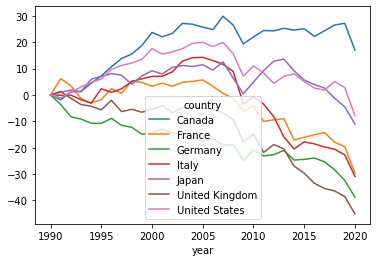

In [84]:
data.plot()

\-30\-